# TumorNet: Neural Network-Based Breast Cancer Detection

### **Business Problem: Early Detection and Classification of Breast Cancer Tumors Using Machine Learning**

## **Overview:**
Breast cancer remains one of the most prevalent health challenges worldwide, affecting millions of women each year. In 2015 alone, breast cancer impacted over 2.1 million people, making it the most common cancer among women globally, accounting for 25% of all cancer cases.

For healthcare providers and insurers, the early detection and accurate classification of breast cancer tumors is crucial. It directly impacts **patient outcomes**, **treatment plans**, and **healthcare costs**. Classifying tumors as either **malignant (cancerous)** or **benign (non-cancerous)** allows for prompt intervention, improving survival rates and reducing the costs associated with late-stage cancer treatments.


## **Key Business Challenges**:
- **Accurate Diagnosis**: Early diagnosis is critical to ensure timely treatment. Misclassification of tumors can result in delayed care or unnecessary treatments, affecting patient outcomes and healthcare costs.
- **Cost Management**: Malignant tumors often require expensive treatment and long-term care. Insurance companies need to manage risks associated with high-cost claims. Accurate classification helps in **predictive risk modeling** and more precise underwriting.
- **Healthcare Efficiency**: By deploying machine learning models to assist healthcare providers, the time and effort required to manually analyze and diagnose tumors can be reduced, leading to a more efficient healthcare system.

## **Objective**:
To develop and select the most accurate **machine learning model** that classifies breast cancer tumors as **malignant** or **benign** based on diagnostic features extracted from medical data. This model will assist healthcare providers in making data-driven, reliable, and timely diagnoses, improving patient care while managing costs associated with cancer treatments.

## **Business Impact**:
- **Healthcare Providers**: Implementing this model in hospitals and clinics can assist physicians in making more accurate and data-driven diagnoses, improving overall healthcare efficiency and patient outcomes.
- **Insurance Companies**: Insurers can integrate predictive models like this one into their underwriting and claims management processes, enabling them to assess risk more effectively and reduce costs associated with cancer treatments.
- **Patients**: Early diagnosis and appropriate treatment lead to better patient outcomes, reducing mortality rates and improving the quality of life for cancer patients.

---

## **Conclusion**:
This machine learning solution addresses the critical challenge of accurately classifying breast tumors as malignant or benign. By implementing this solution, healthcare providers can enhance diagnostic accuracy and efficiency, while insurers can better manage the financial risks associated with cancer treatment. Ultimately, this model has the potential to significantly improve patient care, optimize healthcare delivery, and reduce costs across the healthcare ecosystem.


### Further Development : We can build a front end which accepts the document with values, extracts the values, runs using ML Model and gives output

# Import libraries

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
import warnings
warnings.filterwarnings('ignore')

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [121]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [122]:
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier

In [123]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(3)

In [124]:
from sklearn.metrics  import f1_score, accuracy_score, classification_report, confusion_matrix, recall_score, precision_score

# Reading the dataset

In [125]:
data=pd.read_csv('breast-cancer.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [126]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [128]:
data.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

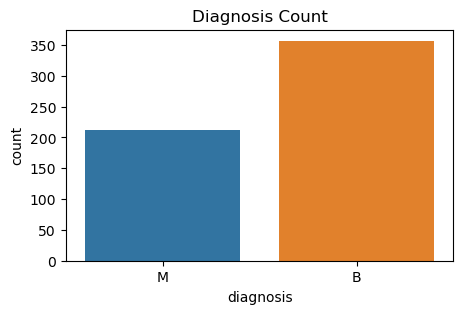

In [129]:
# Count of Diagnosis (M = Malignant, B = Benign)
plt.figure(figsize=(5,3))
sns.countplot(x='diagnosis', data=data)
plt.title('Diagnosis Count')
plt.show()

In [130]:
data.groupby(data.diagnosis).mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [131]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [132]:
data.duplicated().sum()

0

In [133]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


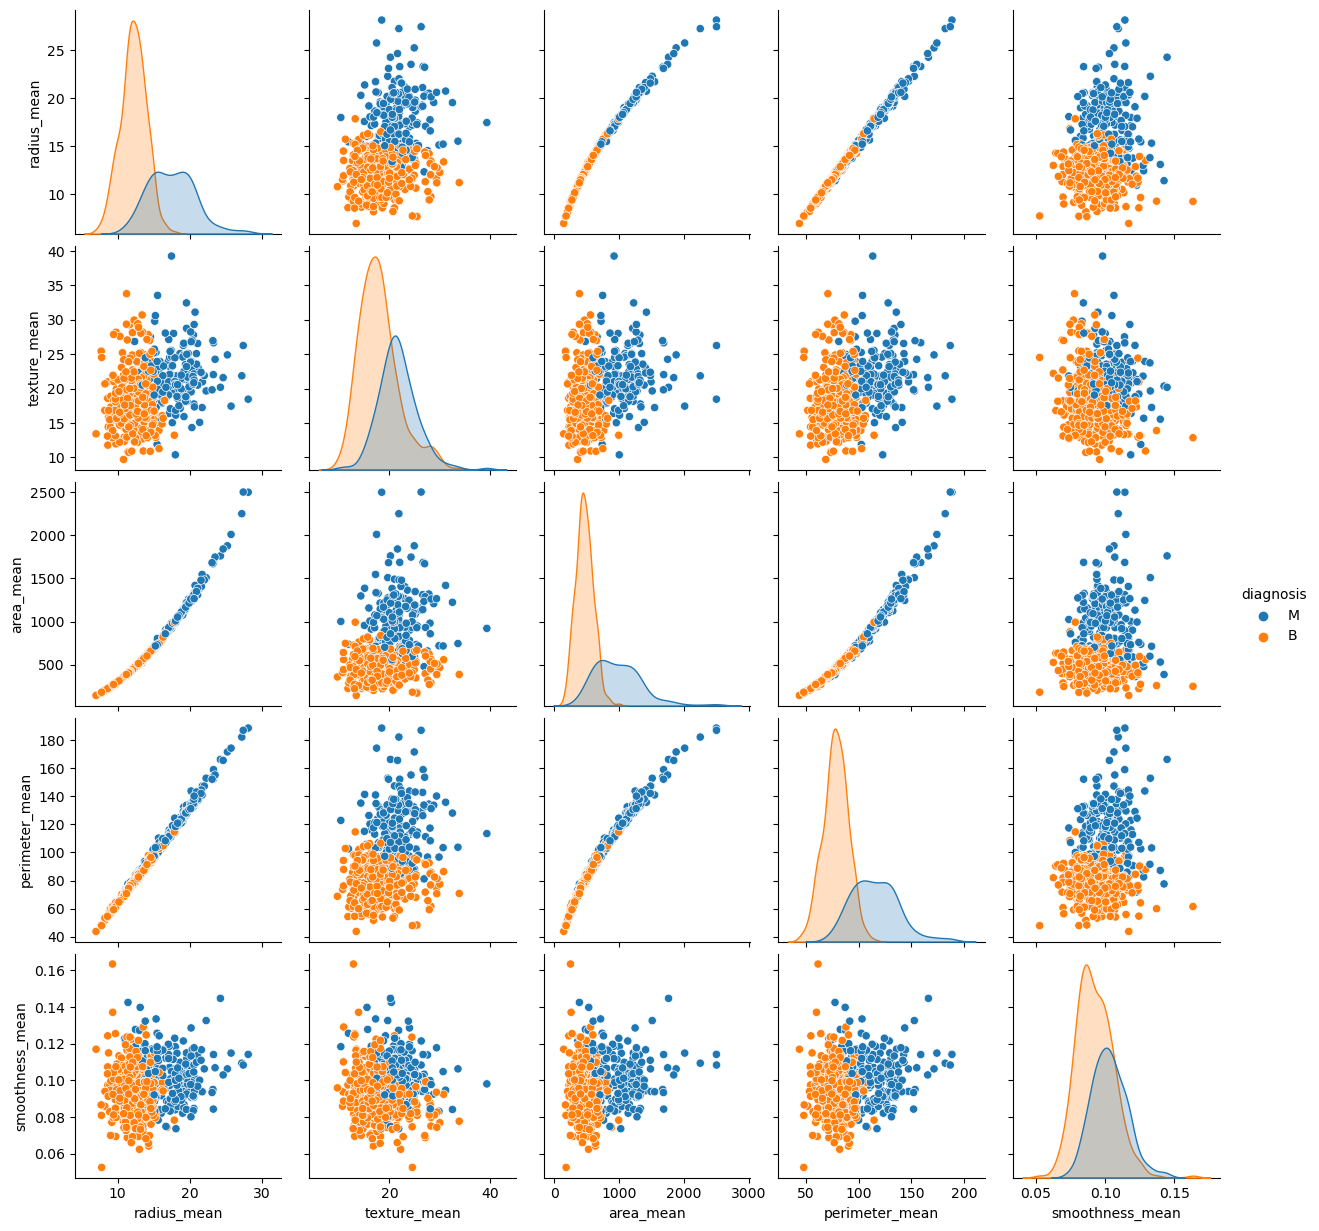

In [134]:
# Pairplot for a quick overview of relationships between variables
sns.pairplot(data, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean',"smoothness_mean"])
plt.show()

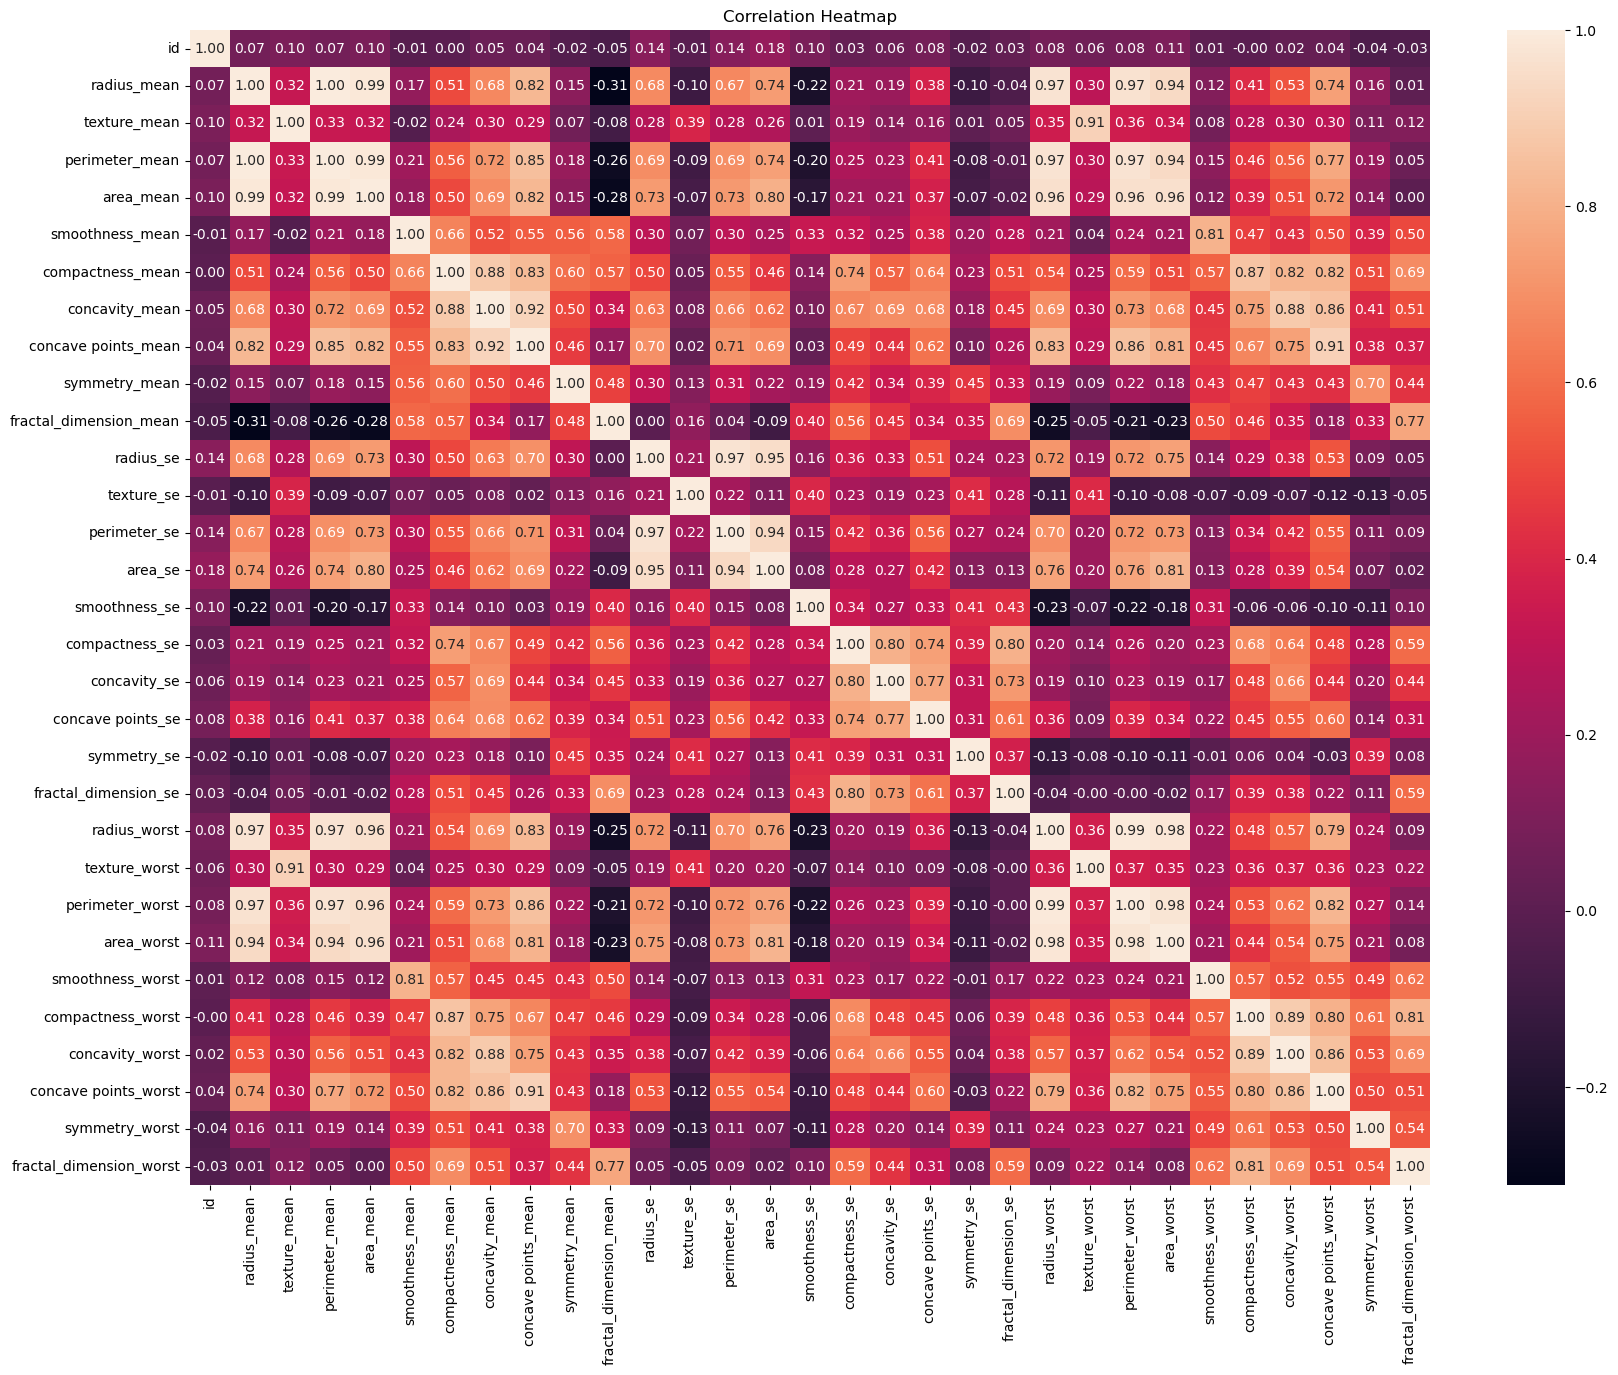

In [135]:
# Step 1: Identify non-numeric columns

# Step 2: Drop or convert non-numeric columns (e.g., 'M' seems to be a category like 'Malignant'/'Benign')
# Assuming 'M' is in a column such as 'diagnosis', which is categorical:
data_cleaned = data.drop(columns=['diagnosis'])  # Drop if not needed in correlation

# Alternatively, convert categorical column (e.g., diagnosis) to numeric (if needed)
# data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})  # M for malignant, B for benign

# Step 3: Generate the correlation heatmap with only numeric features
plt.figure(figsize=(20, 15))
correlation = data_cleaned.corr()  # Generate correlation matrix
sns.heatmap(correlation, annot=True, fmt=".2f")  # Plot the heatmap
plt.title('Correlation Heatmap')
plt.show()


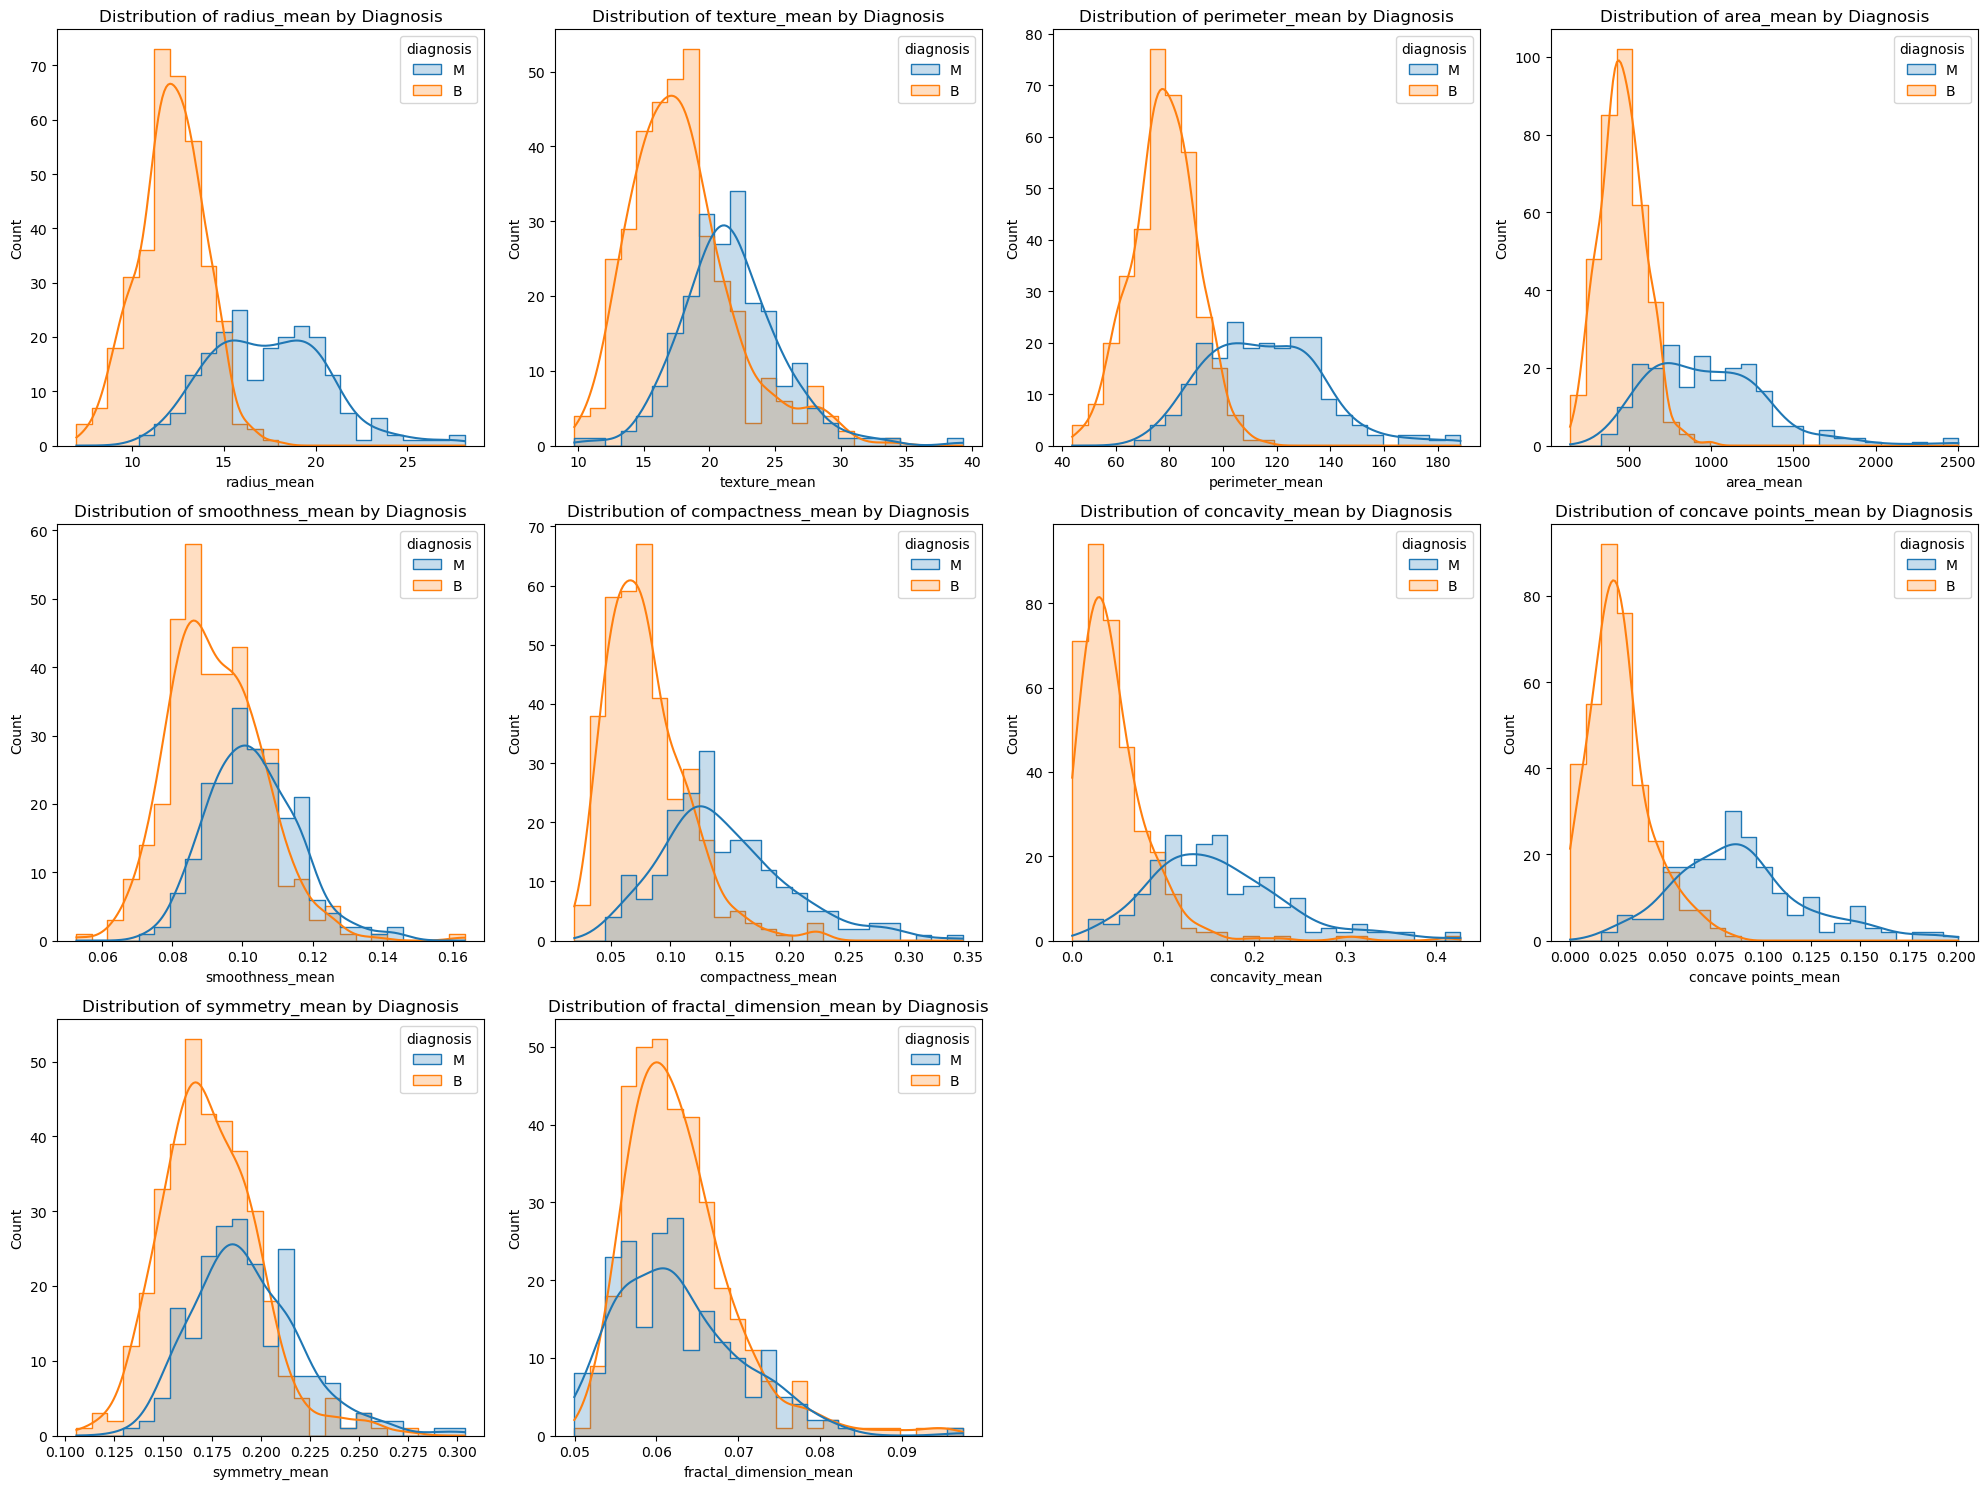

In [136]:
# Distribution Plots for Mean Features by Diagnosis
mean_columns = data.columns[2:12]  # Selecting columns related to mean features
plt.figure(figsize=(20,15))

for i, column in enumerate(mean_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data=data, x=column, hue='diagnosis', kde=True, element="step", bins=25)
    plt.title(f'Distribution of {column} by Diagnosis')

plt.tight_layout()
plt.show()


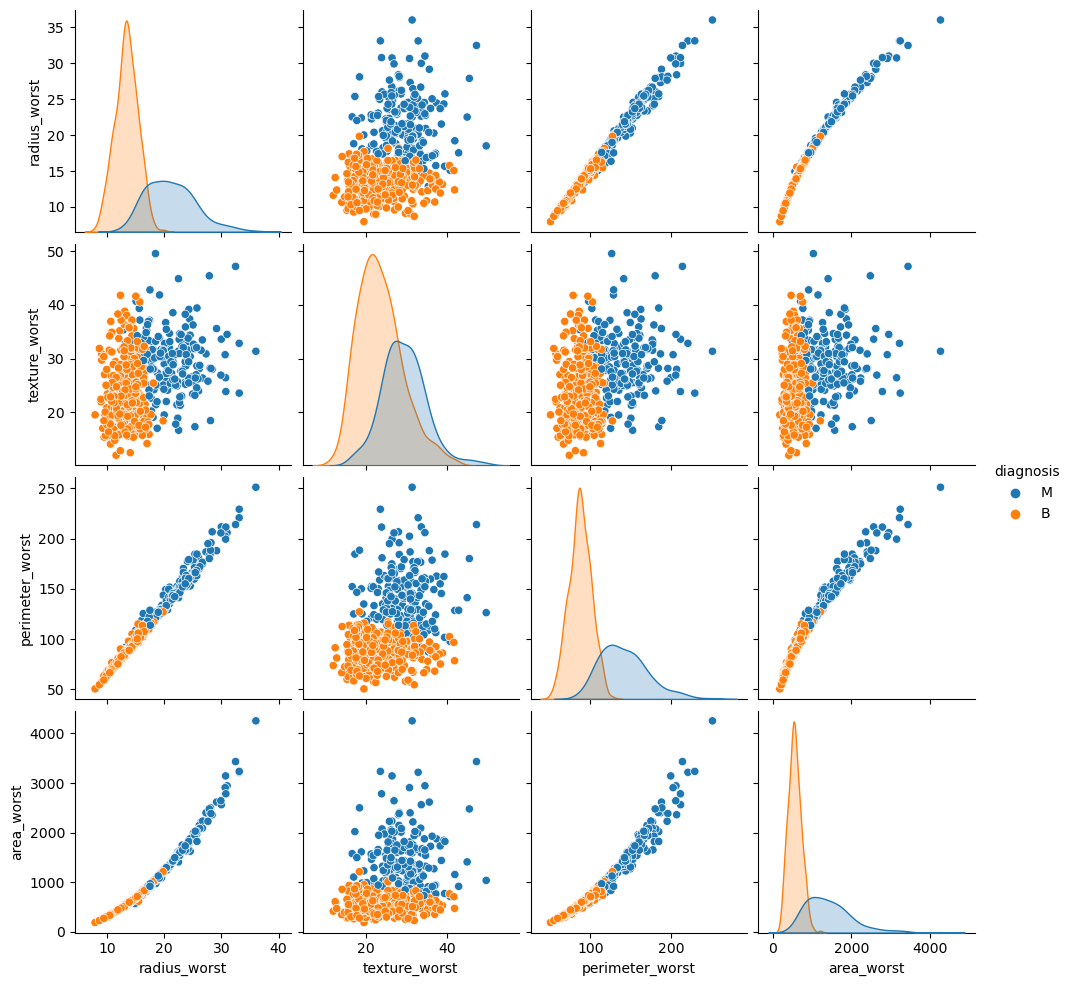

In [137]:
worst_features = data[['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'diagnosis']]

# Creating a pairplot for "worst" features
sns.pairplot(worst_features, hue='diagnosis', diag_kind='kde')
plt.show()

# Splitting the dataset

In [138]:
X=data.drop(['id','diagnosis'],axis=1)
y=data['diagnosis'].map(lambda x: 1 if x == 'M' else 0)            

In [139]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [140]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

# Train Test Split

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [142]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
356,13.05,18.59,85.09,512.0,0.10820,0.13040,0.09603,0.056030,0.2035,0.06501,...,14.19,24.85,94.22,591.2,0.1343,0.26580,0.25730,0.12580,0.3113,0.08317
22,15.34,14.26,102.50,704.4,0.10730,0.21350,0.20770,0.097560,0.2521,0.07032,...,18.07,19.08,125.10,980.9,0.1390,0.59540,0.63050,0.23930,0.4667,0.09946
74,12.31,16.52,79.19,470.9,0.09172,0.06829,0.03372,0.022720,0.1720,0.05914,...,14.11,23.21,89.71,611.1,0.1176,0.18430,0.17030,0.08660,0.2618,0.07609
546,10.32,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,0.1885,0.06201,...,11.25,21.77,71.12,384.9,0.1285,0.08842,0.04384,0.02381,0.2681,0.07399
345,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.020370,0.1633,0.07005,...,10.88,19.48,70.89,357.1,0.1360,0.16360,0.07162,0.04074,0.2434,0.08488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,11.64,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.034850,0.1801,0.06520,...,13.14,29.26,85.51,521.7,0.1688,0.26600,0.28730,0.12180,0.2806,0.09097
437,14.04,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.029440,0.1714,0.05898,...,15.66,21.58,101.20,750.0,0.1195,0.12520,0.11170,0.07453,0.2725,0.07234
297,11.76,18.14,75.00,431.1,0.09968,0.05914,0.02685,0.035150,0.1619,0.06287,...,13.36,23.39,85.10,553.6,0.1137,0.07974,0.06120,0.07160,0.1978,0.06915
164,23.27,22.04,152.10,1686.0,0.08439,0.11450,0.13240,0.097020,0.1801,0.05553,...,28.01,28.22,184.20,2403.0,0.1228,0.35830,0.39480,0.23460,0.3589,0.09187


In [143]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
449,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.157200,0.11550,0.1554,0.05661,...,25.68,32.07,168.20,2022.0,0.1368,0.3101,0.43990,0.22800,0.2268,0.07425
230,17.05,19.08,113.40,895.0,0.11410,0.15720,0.191000,0.10900,0.2131,0.06325,...,19.59,24.89,133.50,1189.0,0.1703,0.3934,0.50180,0.25430,0.3109,0.09061
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
202,23.29,26.67,158.90,1685.0,0.11410,0.20840,0.352300,0.16200,0.2200,0.06229,...,25.12,32.68,177.00,1986.0,0.1536,0.4167,0.78920,0.27330,0.3198,0.08762
201,17.54,19.32,115.10,951.6,0.08968,0.11980,0.103600,0.07488,0.1506,0.05491,...,20.42,25.84,139.50,1239.0,0.1381,0.3420,0.35080,0.19390,0.2928,0.07867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,15.37,22.76,100.20,728.2,0.09200,0.10360,0.112200,0.07483,0.1717,0.06097,...,16.43,25.84,107.50,830.9,0.1257,0.1997,0.28460,0.14760,0.2556,0.06828
163,12.34,22.22,79.85,464.5,0.10120,0.10150,0.053700,0.02822,0.1551,0.06761,...,13.58,28.68,87.36,553.0,0.1452,0.2338,0.16880,0.08194,0.2268,0.09082
226,10.44,15.46,66.62,329.6,0.10530,0.07722,0.006643,0.01216,0.1788,0.06450,...,11.52,19.80,73.47,395.4,0.1341,0.1153,0.02639,0.04464,0.2615,0.08269
540,11.54,14.44,74.65,402.9,0.09984,0.11200,0.067370,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.17970,0.06918,0.2329,0.08134


In [144]:
y_train

356    0
22     1
74     0
546    0
345    0
      ..
106    0
437    0
297    1
164    1
496    0
Name: diagnosis, Length: 455, dtype: int64

# Scaling the data

In [145]:
scaler = StandardScaler()

In [146]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [147]:
X_train

array([[-0.26694212, -0.16237212, -0.24479619, ...,  0.20858802,
         0.37439976, -0.06550157],
       [ 0.40629622, -1.14977082,  0.49847517, ...,  1.95900699,
         2.94398946,  0.81904892],
       [-0.48449512, -0.63440799, -0.49668022, ..., -0.39596197,
        -0.44409889, -0.44994709],
       ...,
       [-0.64618992, -0.26498861, -0.67556058, ..., -0.62729488,
        -1.50235977, -0.82679058],
       [ 2.73764123,  0.62435433,  2.61600874, ...,  1.88652268,
         1.16148129,  0.40691029],
       [-0.38453834, -0.25814751, -0.34725749, ...,  0.4383787 ,
         0.56786308,  1.02756174]])

In [148]:
X_train.shape

(455, 30)

In [149]:
y_train.shape

(455,)

In [150]:
y_test.shape

(114,)

In [151]:
X_test.shape

(114, 30)

# Model


In [152]:
compare=pd.DataFrame({'Model':[], "Training Accuracy":[], "Testing Accuracy":[], "F1 Score":[], "Recall":[], 
                     "Precision":[]})
compare

,Model,Training Accuracy,Testing Accuracy,F1 Score,Recall,Precision


* ## KNN

In [153]:
knn=KNeighborsClassifier(n_neighbors=9)

In [154]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [155]:
y_pred=knn.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1])

In [156]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        69
           1       0.95      0.91      0.93        45

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [157]:
train_acc=knn.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9736263736263736
Testing Accuracy : 0.9473684210526315
F1 Score : 0.9318181818181819
Recall : 0.9111111111111111
Precision : 0.9534883720930233


In [158]:
compare.loc[0]=['KNN', train_acc, test_acc, f1, recal, prec]

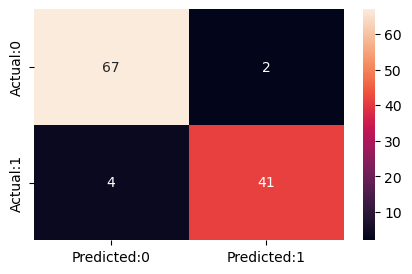

In [159]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

* ## Naives Bayes

In [160]:
NB = GaussianNB()

In [161]:
NB.fit(X_train,y_train)

GaussianNB()

In [162]:
y_pred=NB.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1])

In [163]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        69
           1       0.91      0.93      0.92        45

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [164]:
train_acc=NB.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9318681318681319
Testing Accuracy : 0.9385964912280702
F1 Score : 0.9230769230769231
Recall : 0.9333333333333333
Precision : 0.9130434782608695


In [165]:
compare.loc[1]=['Gaussian Naives Bayes', train_acc, test_acc, f1, recal, prec]

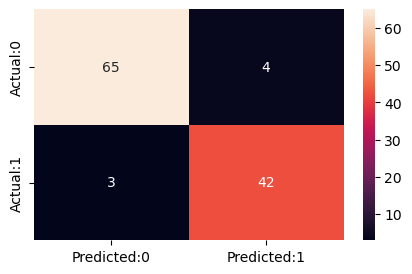

In [166]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

* ## Decision Tree

In [167]:
DT=DecisionTreeClassifier(random_state=8)

In [168]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(random_state=8)

In [169]:
y_pred=DT.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1])

In [170]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        69
           1       0.91      0.93      0.92        45

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [171]:
train_acc=DT.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 1.0
Testing Accuracy : 0.9385964912280702
F1 Score : 0.9230769230769231
Recall : 0.9333333333333333
Precision : 0.9130434782608695


In [172]:
compare.loc[2]=['Decision Tree', train_acc, test_acc, f1, recal, prec]

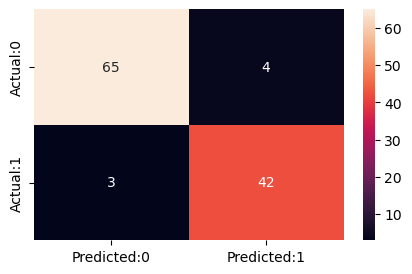

In [173]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

* ## Gradient Boosting

In [174]:
GB=GradientBoostingClassifier(n_estimators=12)

In [175]:
GB.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=12)

In [176]:
y_pred=GB.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1])

In [177]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        69
           1       0.95      0.89      0.92        45

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [178]:
train_acc=GB.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9802197802197802
Testing Accuracy : 0.9385964912280702
F1 Score : 0.9195402298850575
Recall : 0.8888888888888888
Precision : 0.9523809523809523


In [179]:
compare.loc[3]=['Gradient Boosting', train_acc, test_acc, f1, recal, prec]

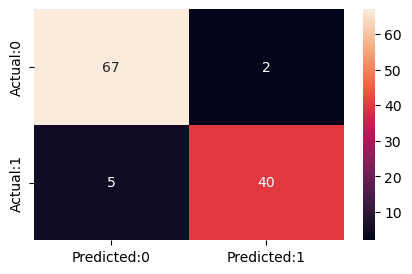

In [180]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

* ## LGBM

In [181]:
LGBM=LGBMClassifier(random_state=0,n_estimators=22)

In [182]:
LGBM.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 167, number of negative: 288
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000325 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.367033 -> initscore=-0.544967
[LightGBM] [Info] Start training from score -0.544967
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

LGBMClassifier(n_estimators=22, random_state=0)

In [183]:
y_pred=LGBM.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1])

In [184]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        69
           1       0.95      0.93      0.94        45

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [185]:
train_acc=LGBM.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9868131868131869
Testing Accuracy : 0.956140350877193
F1 Score : 0.9438202247191012
Recall : 0.9333333333333333
Precision : 0.9545454545454546


In [186]:
compare.loc[4]=['LGBM', train_acc, test_acc, f1, recal, prec]

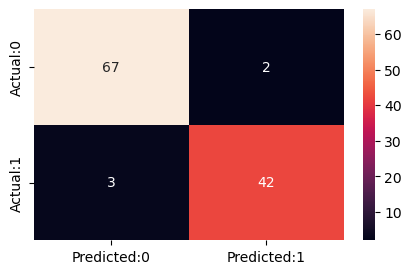

In [187]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

* ## Neural Network

In [188]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(2,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [189]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │         3,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,302 (12.90 KB)

 Trainable params: 3,302 (12.90 KB)

 Non-trainable params: 0 (0.00 B)

In [190]:
history=model.fit(X_train,y_train,epochs=20,validation_split=0.1,shuffle=True)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8621 - loss: 0.3909 - val_accuracy: 0.9348 - val_loss: 0.2903
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.9551 - loss: 0.1848 - val_accuracy: 0.9348 - val_loss: 0.2481
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.9639 - loss: 0.1281 - val_accuracy: 0.9348 - val_loss: 0.2346
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.9774 - loss: 0.1031 - val_accuracy: 0.9348 - val_loss: 0.2281
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.9821 - loss: 0.0887 - val_accuracy: 0.9565 - val_loss: 0.2248
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.9847 - loss: 0.0786 - val_accuracy: 0.9565 - val_loss: 0.2240
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.9880 - loss: 0.0707 - val_accuracy: 0.9565 - val_loss: 0.2252
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.9880 - loss: 0.0643 - val_accuracy: 0.95

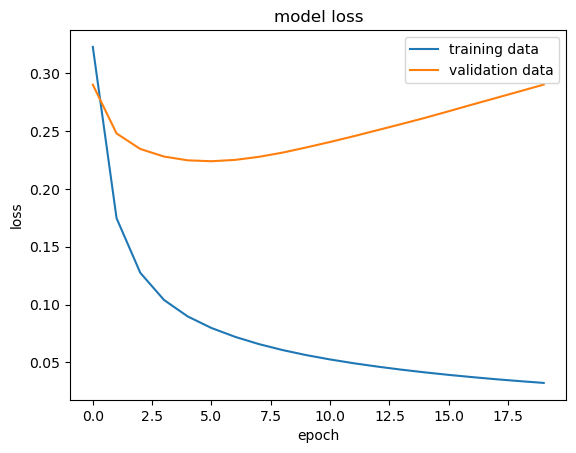

In [191]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

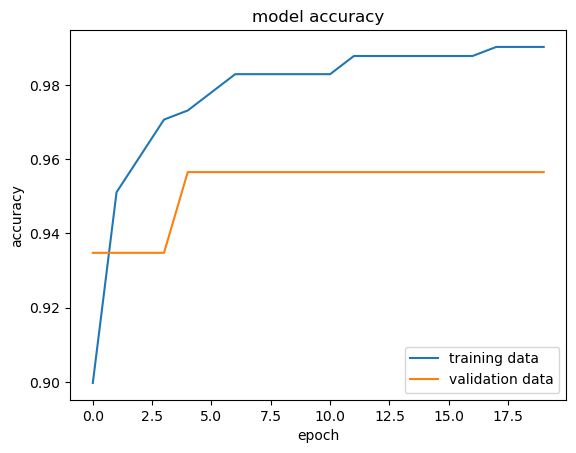

In [192]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

In [193]:
loss, accuracy = model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.9464 - loss: 0.0983


In [194]:
X_test[0]

array([ 2.09968175,  0.27773862,  2.01831781,  2.21239698,  0.04149357,
        0.26848042,  0.94892316,  1.80555078, -0.91701726, -0.89978976,
        1.00915088,  0.22401513,  0.90655524,  1.01630808, -0.525726  ,
       -0.26163497,  0.0493902 ,  0.50659541, -1.26277451, -0.63903658,
        2.00734782,  1.00763181,  1.87122456,  2.04473708,  0.19240702,
        0.35842144,  0.84706337,  1.7847362 , -1.02283531, -0.54985948])

In [195]:
y_pred = model.predict(X_test)
y_pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[1.56727689e-03, 9.99405921e-01],
       [7.60296872e-03, 9.85538006e-01],
       [1.92977451e-02, 9.89194334e-01],
       [1.40048418e-04, 9.99966860e-01],
       [8.06061327e-02, 9.67978060e-01],
       [1.48314545e-02, 9.95205283e-01],
       [2.31561940e-02, 9.45408583e-01],
       [9.79958117e-01, 4.46293177e-03],
       [4.27268296e-01, 5.56767404e-01],
       [9.86754358e-01, 4.68207384e-03],
       [8.72705281e-01, 8.36449936e-02],
       [9.92328525e-01, 1.89653016e-03],
       [9.36390996e-01, 3.98490243e-02],
       [9.79597926e-01, 5.91031509e-03],
       [9.02782500e-01, 3.18188779e-02],
       [4.78362292e-03, 9.99007225e-01],
       [1.94003480e-03, 9.99164939e-01],
       [2.72012055e-01, 6.32769048e-01],
       [9.27135110e-01, 2.18458716e-02],
       [9.14257586e-01, 3.21163759e-02],
       [9.86632347e-01, 1.21681008e-03],
       [5.42366803e-01, 4.61900711e-01],
       [1.42907887e-03, 9.99370754e-01],
       [9.19728756e-01, 7.56560117e-02],
       [1.132164

In [196]:
y_pred[0]

array([0.00156728, 0.9994059 ], dtype=float32)

In [197]:
np.argmax(y_pred[0])

1

In [198]:
y_test[:1]

449    1
Name: diagnosis, dtype: int64

In [199]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1]

In [200]:
print(classification_report(y_test,y_pred_labels))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        69
           1       0.94      0.98      0.96        45

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [201]:
accuracy

0.9649122953414917

In [202]:
metric = tf.keras.metrics.Recall()
metric.update_state(y_test, y_pred_labels)
print("Recall =",metric.result().numpy())

Recall = 0.9777778


In [203]:
m = tf.keras.metrics.Precision()
m.update_state(y_test, y_pred_labels)
print("Precision =",m.result().numpy())

Precision = 0.9361702


In [204]:
y_pred_train_labels=[np.argmax(i) for i in model.predict(X_train)] 
y_pred_train_labels

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step


[0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,


In [205]:
train_acc=accuracy_score(y_train,y_pred_train_labels)
test_acc=accuracy_score(y_test,y_pred_labels)
recal=recall_score(y_test,y_pred_labels)
prec=precision_score(y_test,y_pred_labels)
f1=f1_score(y_test,y_pred_labels)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9868131868131869
Testing Accuracy : 0.9649122807017544
F1 Score : 0.9565217391304347
Recall : 0.9777777777777777
Precision : 0.9361702127659575


In [206]:
compare.loc[5]=['Neural Network', train_acc, test_acc, f1, recal, prec]

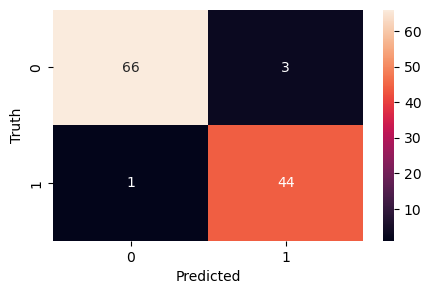

In [207]:
cm = tf.math.confusion_matrix(y_test,y_pred_labels)
plt.figure(figsize = (5,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Model Selection / Conclusion

In [208]:
compare

,Model,Training Accuracy,Testing Accuracy,F1 Score,Recall,Precision
0,KNN,0.973626,0.947368,0.931818,0.911111,0.953488
1,Gaussian Naives Bayes,0.931868,0.938596,0.923077,0.933333,0.913043
2,Decision Tree,1.000000,0.938596,0.923077,0.933333,0.913043
3,Gradient Boosting,0.980220,0.938596,0.919540,0.888889,0.952381
4,LGBM,0.986813,0.956140,0.943820,0.933333,0.954545
5,Neural Network,0.986813,0.964912,0.956522,0.977778,0.936170


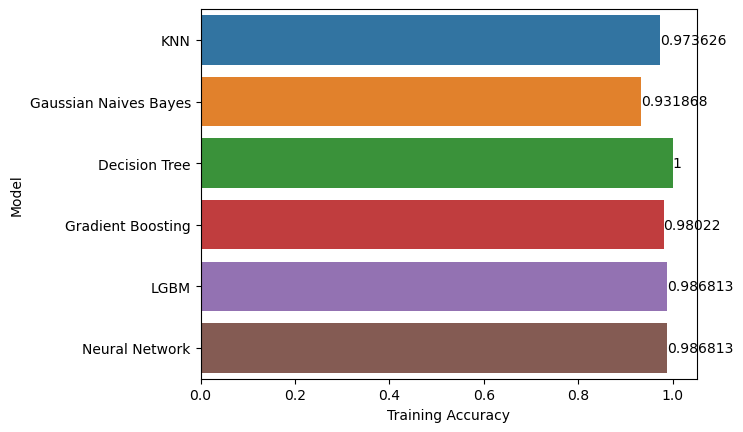

In [209]:
ax=sns.barplot(data=compare,y='Model',x='Training Accuracy')
for i in ax.containers:
    ax.bar_label(i)

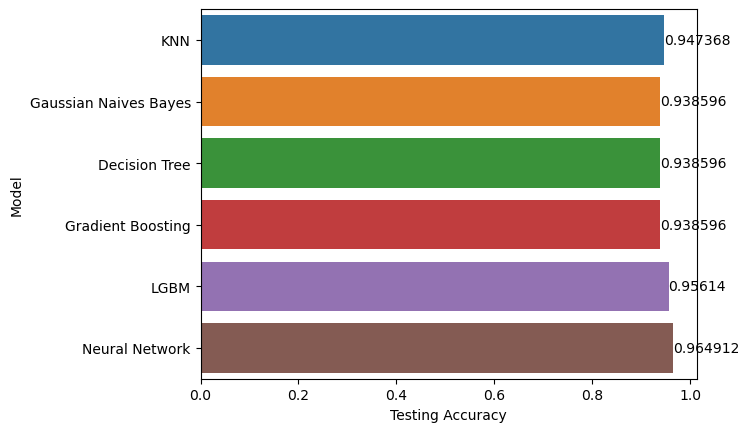

In [210]:
ax=sns.barplot(data=compare,y='Model',x='Testing Accuracy')
for i in ax.containers:
    ax.bar_label(i)

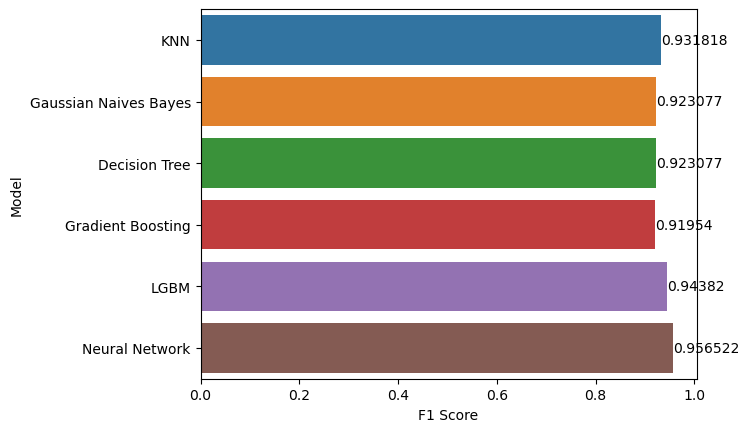

In [211]:
ax=sns.barplot(data=compare,y='Model',x='F1 Score')
for i in ax.containers:
    ax.bar_label(i)

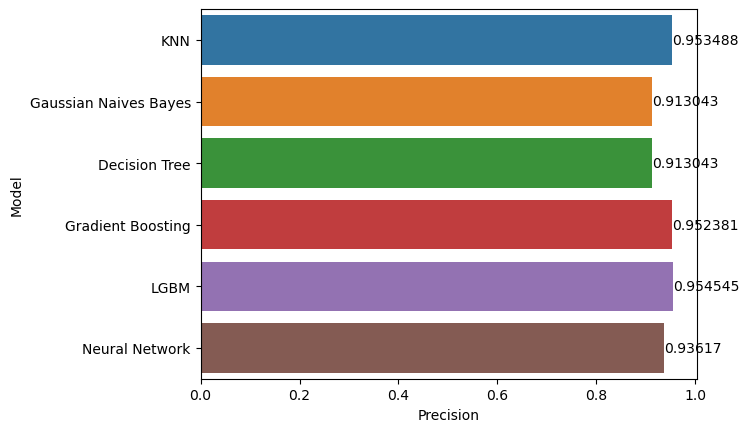

In [212]:
ax=sns.barplot(data=compare,y='Model',x='Precision')
for i in ax.containers:
    ax.bar_label(i)

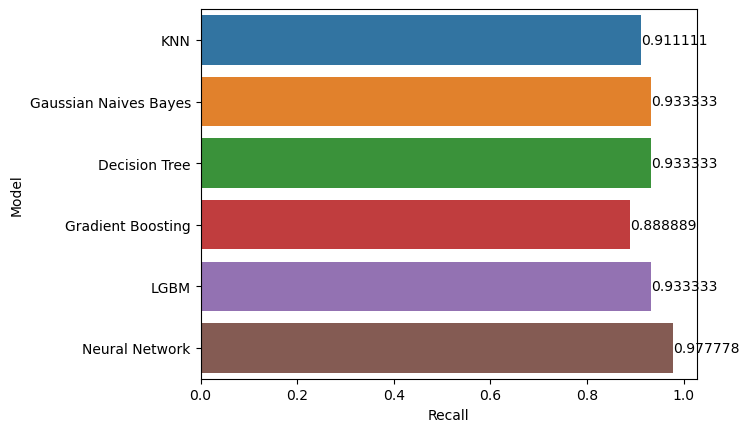

In [213]:
ax=sns.barplot(data=compare,y='Model',x='Recall')
for i in ax.containers:
    ax.bar_label(i)

# Prediction

In [214]:
# i will be using Neural Network for prediction
def predict_cancer(input):
    df=scaler.transform(np.array([input]))
    prediction = model.predict(df)
    prediction_label = np.argmax(prediction)
    return 'The tumor is Malignant (cancerous)' if prediction_label==1 else 'The tumor is Benign (non-cancerous)'

In [215]:
List_col=[col for col in X.columns]
List_col.insert(0,'id')
print(List_col)

['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [218]:
print('----------------------------------------------------------------------------------------------------------------------')
print('\t\t\t\t *** BREAST CANCER PREDICTION SYSTEM ***')   
print('----------------------------------------------------------------------------------------------------------------------')
print('Please fill the following details =>\n')
patient_data=[]
for col in List_col:
    val=int(input('Enter the {}:'.format(col))) if col=='id' else float(input('Enter the {}:'.format(col)))
    patient_data.append(val)
print('\n\n')
print('----------------------------------------------------------------------------------------------------------------------')
result=predict_cancer(patient_data[1:])
print('PREDICTION :',end=' ')
print(result)
print('----------------------------------------------------------------------------------------------------------------------')

----------------------------------------------------------------------------------------------------------------------
				 *** BREAST CANCER PREDICTION SYSTEM ***
----------------------------------------------------------------------------------------------------------------------
Please fill the following details =>

Enter the id:12
Enter the radius_mean:2
Enter the texture_mean:4
Enter the perimeter_mean:6
Enter the area_mean:2
Enter the smoothness_mean:34
Enter the compactness_mean:1
Enter the concavity_mean:2
Enter the concave points_mean:5
Enter the symmetry_mean:2
Enter the fractal_dimension_mean:87
Enter the radius_se:3
Enter the texture_se:45
Enter the perimeter_se:2
Enter the area_se:4
Enter the smoothness_se:6
Enter the compactness_se:7
Enter the concavity_se:9
Enter the concave points_se:1
Enter the symmetry_se:21
Enter the fractal_dimension_se:12
Enter the radius_worst:3
Enter the texture_worst:5
Enter the perimeter_worst:6
Enter the area_worst:7
Enter the smoothness_worst